In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestRegressor

from prophet import Prophet

In [2]:
# create fake NIM figures

# 24-month date range
dates = pd.date_range(start="2023-01-01", periods=24, freq="ME")

# Generate random NIM values between 1.50 and 1.60
np.random.seed(42)
nim_values = np.round(np.random.uniform(1.50, 1.60, size=24), 3)

# Create DataFrame
nim_df = pd.DataFrame({
    "Date": dates,
    "NIM": nim_values
})

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:

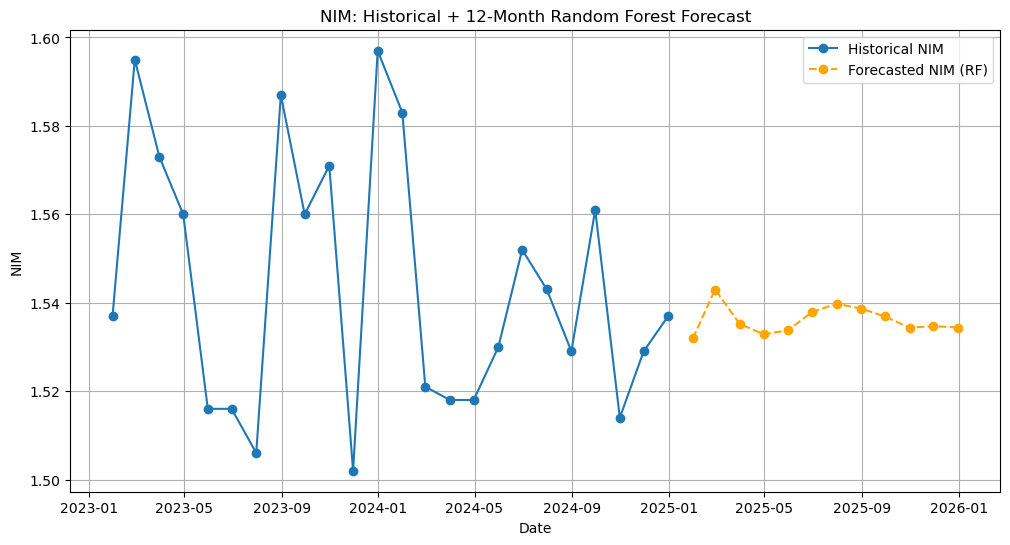

In [18]:
df = nim_df.copy()

for lag in range(1, 7):  # use last 6 months as features
    df[f"lag_{lag}"] = df["NIM"].shift(lag)

df = df.dropna().reset_index(drop=True)

# --- Step 3: Train Random Forest ---
X = df[["lag_1", "lag_2", "lag_3","lag_4", "lag_5", "lag_6"]]
y = df["NIM"]

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# --- Step 4: Forecast next 12 months ---
last_values = nim_df["NIM"].values[-6:].tolist()
forecast_values = []

for _ in range(12):
    pred = rf.predict([last_values[-6:]])[0]
    forecast_values.append(pred)
    last_values.append(pred)

# --- Step 5: Prepare forecast DataFrame ---
forecast_dates = pd.date_range(start=nim_df["Date"].iloc[-1] + pd.offsets.MonthEnd(1), periods=12, freq="M")
forecast_df = pd.DataFrame({"Date": forecast_dates, "NIM": forecast_values})

# --- Step 6: Plot historical + forecast ---
plt.figure(figsize=(12, 6))
plt.plot(nim_df["Date"], nim_df["NIM"], label="Historical NIM", marker='o')
plt.plot(forecast_df["Date"], forecast_df["NIM"], label="Forecasted NIM (RF)", linestyle='--', marker='o', color='orange')
plt.title("NIM: Historical + 12-Month Random Forest Forecast")
plt.xlabel("Date")
plt.ylabel("NIM")
plt.legend()
plt.grid(True)
plt.show()